# Is it still worth becoming Data Scientist?

For a while, data scientist is assumed to be one of the best job in the world. On the other hands some of them are constantly mentioning this job will disappear in the near future. To investigate which opinion make more sense, folowing questions are posed: The number of data scientist is increased in the latest year? Are they satisfied with their occupancy? and How much is their salary?

In [236]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

## Business understanding

Following three questions are 

1. How many data scientists increased from 2018 to 2019?
2. How much data scientists satisfied with their job in 2018 and 2019?
3. How is the tendency of data scientist's annual salary in 2018 and 2019?

## Data understanding

In [237]:
# load data
df_2018schema = pd.read_csv('data/2018_survey_results_schema.csv', dtype=np.object)
df_2018       = pd.read_csv('data/2018_survey_results_public.csv', dtype=np.object)
df_2019schema = pd.read_csv('data/2019_survey_results_schema.csv', dtype=np.object)
df_2019       = pd.read_csv('data/2019_survey_results_public.csv', dtype=np.object)

In [238]:
print(df_2019.shape)
print(df_2018.shape)

(88883, 85)
(98855, 129)


In 2019 survey, the number of developer who answered survey was 888835. In 2018, it was 98855.
Also the number of questions are decreased from 129 to 85 in 2019.


In [239]:
df_2019schema[(df_2019schema.Column == 'DevType') | (df_2019schema.Column == 'JobSat') | (df_2019schema['Column'] == 'ConvertedComp') ]

,Column,QuestionText
12,DevType,Which of the following describe you? Please se...
17,JobSat,How satisfied are you with your current job? (...
31,ConvertedComp,Salary converted to annual USD salaries using ...


In [240]:
df_2018schema[(df_2018schema.Column == 'DevType') | (df_2018schema.Column == 'JobSatisfaction') | (df_2018schema['Column'] == 'ConvertedSalary') ]

,Column,QuestionText
9,DevType,Which of the following describe you? Please se...
12,JobSatisfaction,How satisfied are you with your current job? I...
54,ConvertedSalary,Salary converted to annual USD salaries using ...


In each year, the data on column above is selected to estimate the question

## Data preparation

preprocess the data before analysis

In [241]:
# delete unnecessary columns to answer the question
df_2019 = df_2019[['DevType','JobSat','ConvertedComp']]
df_2018 = df_2018[['DevType','JobSatisfaction','ConvertedSalary']]
df_2019.head()

,DevType,JobSat,ConvertedComp
0,NaN,NaN,NaN
1,"Developer, desktop or enterprise applications;...",NaN,NaN
2,"Designer;Developer, back-end;Developer, front-...",Slightly satisfied,8820
3,"Developer, full-stack",Slightly satisfied,61000
4,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,NaN


In [242]:
df_2018.head()

,DevType,JobSatisfaction,ConvertedSalary
0,Full-stack developer,Extremely satisfied,NaN
1,Database administrator;DevOps specialist;Full-...,Moderately dissatisfied,70841
2,Engineering manager;Full-stack developer,Moderately satisfied,NaN
3,Full-stack developer,Neither satisfied nor dissatisfied,NaN
4,Data or business analyst;Desktop or enterprise...,Slightly satisfied,21426


In [243]:
# check NaN value 
df_2019.isnull().sum()

DevType           7548
JobSat           17895
ConvertedComp    33060
dtype: int64

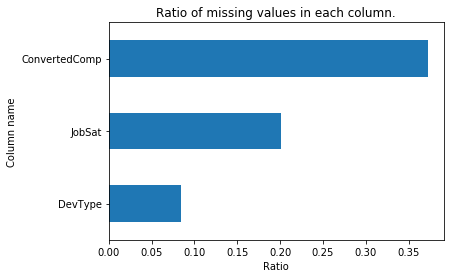

In [244]:
(df_2019.isnull().sum() / df_2019.shape[0]).sort_values().plot.barh(cmap='tab20')
plt.title('Ratio of missing values in each column.')
plt.xlabel('Ratio')
plt.ylabel('Column name')
plt.show()

In [245]:
df_2018.isnull().sum()

DevType             6757
JobSatisfaction    29579
ConvertedSalary    51153
dtype: int64

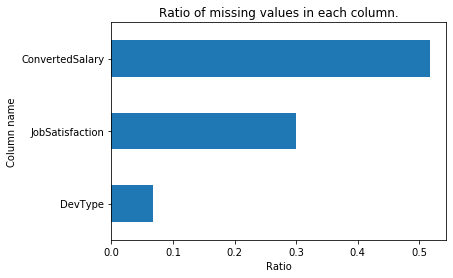

In [246]:
(df_2018.isnull().sum() / df_2018.shape[0]).sort_values().plot.barh(cmap='tab20')
plt.title('Ratio of missing values in each column.')
plt.xlabel('Ratio')
plt.ylabel('Column name')
plt.show()

For this analysis, it is difficult to impute the missing values. Probably not answering specific question is based on some reasons. If machine learning analysis is necessary, imputing missing values can be useful but for exploration analysis and visualization, imputing is not useful and is possibly harmful. Hence, they keep still in this analysis.

In [247]:
# keep data relevant job
df_2019_data = df_2019[df_2019.DevType.str.contains('data scientist|Data scientist')==True]
df_2019_data_ana = df_2019[df_2019.DevType.str.contains('data or business|Data or business')==True]
df_2019_data


,DevType,JobSat,ConvertedComp
5,Data or business analyst;Data scientist or mac...,Slightly satisfied,366420
9,Data or business analyst;Data scientist or mac...,Slightly dissatisfied,13293
11,Data or business analyst;Data scientist or mac...,NaN,NaN
32,Academic researcher;Data scientist or machine ...,Very satisfied,8400
61,Data or business analyst;Data scientist or mac...,Slightly dissatisfied,87994
...,...,...,...
88784,Data scientist or machine learning specialist,NaN,NaN
88786,Academic researcher;Data scientist or machine ...,NaN,NaN
88813,Data or business analyst;Data scientist or mac...,NaN,NaN
88826,Data or business analyst;Data scientist or mac...,NaN,NaN


In [248]:
df_2018_data = df_2018[df_2018.DevType.str.contains('Data scientist|data scientist')==True]
df_2018_data_ana = df_2018[df_2018.DevType.str.contains('Data or business|data or business')==True]
df_2018_data

,DevType,JobSatisfaction,ConvertedSalary
18,Data or business analyst;Data scientist or mac...,Slightly satisfied,NaN
28,Back-end developer;Data scientist or machine l...,Extremely satisfied,NaN
40,Data scientist or machine learning specialist;...,NaN,NaN
62,Back-end developer;Data scientist or machine l...,Moderately satisfied,120000
86,Back-end developer;Data scientist or machine l...,Neither satisfied nor dissatisfied,120000
...,...,...,...
98319,Back-end developer;Data scientist or machine l...,NaN,NaN
98343,Back-end developer;Data or business analyst;Da...,NaN,NaN
98345,Data scientist or machine learning specialist;...,NaN,NaN
98395,Back-end developer;Data or business analyst;Da...,NaN,NaN


In [249]:
# check jobsatisfaction multiple choice
df_2019['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

In [250]:
df_2018['JobSatisfaction'].value_counts()

Moderately satisfied                  26005
Extremely satisfied                   12436
Slightly satisfied                    10012
Slightly dissatisfied                  7057
Moderately dissatisfied                6318
Neither satisfied nor dissatisfied     4966
Extremely dissatisfied                 2482
Name: JobSatisfaction, dtype: int64

In [251]:
# change satisfaction to 0 to 1 scale numerical value
df_2019_data['JobSat'] = df_2019_data['JobSat'].replace({
    'Very dissatisfied':                  0,
    'Slightly dissatisfied':              1,
    'Neither satisfied nor dissatisfied': 2,
    'Slightly satisfied':                 3,
    'Very satisfied':                     4
}) / 4.

C:\Users\ATOM\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [252]:
df_2018_data['JobSatisfaction'] = df_2018_data['JobSatisfaction'].replace({
    'Extremely dissatisfied':             0,
    'Moderately dissatisfied':            1,
    'Slightly dissatisfied':              2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied':                 4,
    'Moderately satisfied':               5,
    'Extremely satisfied':                6
}) / 6.

C:\Users\ATOM\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [314]:
# change str to float
df_2019_data.ConvertedComp = df_2019_data.ConvertedComp.astype('float')
df_2018_data.ConvertedSalary = df_2018_data.ConvertedSalary.astype('float')

C:\Users\ATOM\Miniconda2\envs\lightgbm2\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [347]:
# delete NaN
df_2019_data = df_2019_data.dropna(subset=['ConvertedComp'],how = 'all')
df_2018_data = df_2018_data.dropna(subset=['ConvertedSalary'],how = 'all')
# delete 0
df_2019_data = df_2019_data [(df_2019_data[['ConvertedComp']] != 0).all(axis=1)]
df_2018_data = df_2018_data [(df_2018_data[['ConvertedSalary']] != 0).all(axis=1)]

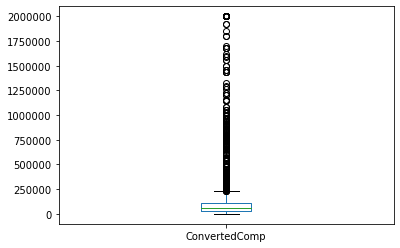

In [350]:
# check salary data
df_2019_data.ConvertedComp.plot(kind='box')
plt.show()

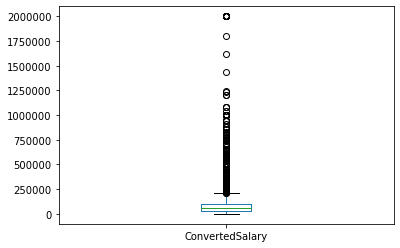

In [351]:
# check salary data
df_2018_data.ConvertedSalary.plot(kind='box')
plt.show()

In [352]:
# remove outliers
Q1 = df_2019_data.ConvertedComp.quantile(0.25)
Q3 = df_2019_data.ConvertedComp.quantile(0.75)
IQR = Q3 = Q1
df_2019_filt = df_2019_data.query('(@Q1 - 5 * @IQR) <= ConvertedComp <= (@Q3 + 5 * @IQR)')               

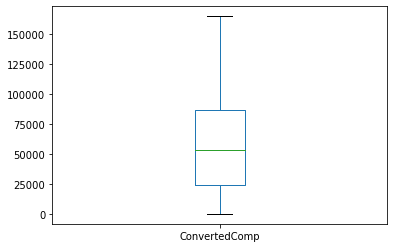

In [353]:
df_2019_filt.ConvertedComp.plot(kind='box')
plt.show()

In [354]:
Q1 = df_2018_data.ConvertedSalary.quantile(0.25)
Q3 = df_2018_data.ConvertedSalary.quantile(0.75)
IQR = Q3 = Q1
df_2018_filt = df_2018_data.query('(@Q1 - 5 * @IQR) <= ConvertedSalary <= (@Q3 + 5 * @IQR)')               

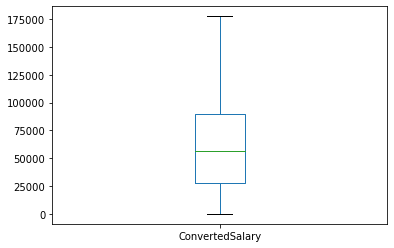

In [355]:
df_2018_filt.ConvertedSalary.plot(kind='box')
plt.show()

## Evaluation

### How many data scientists increased from 2018 to 2019?

In [356]:
print('Proportion of data scientist in 2019',df_2019_data.shape[0]/df_2019.shape[0])
print('Proportion of data scientist in 2018',df_2018_data.shape[0]/df_2018.shape[0])

Proportion of data scientist in 2019 0.04724187977453506
Proportion of data scientist in 2018 0.03717566132213849


In [357]:
print('Proportion of data analyst in 2019',df_2019_data_ana.shape[0]/df_2019.shape[0])
print('Proportion of data analyst in 2018',df_2018_data_ana.shape[0]/df_2018.shape[0])

Proportion of data analyst in 2019 0.07081219130767413
Proportion of data analyst in 2018 0.07646553032218907


In [358]:
proportion = pd.DataFrame({
    'Data scientist or Machine learning specialist': [
        df_2018_data.shape[0] / df_2018.shape[0] * 100,
        df_2019_data.shape[0] / df_2019.shape[0] * 100
    ],
    'Data or business analyst': [
        df_2018_data_ana.shape[0]/df_2018.shape[0] * 100,
        df_2019_data_ana.shape[0]/df_2019.shape[0] * 100
    ]
})

proportion_diff = pd.DataFrame({
    'Difference': [
         df_2019_data_ana.shape[0]/df_2019.shape[0] * 100
            -df_2018_data_ana.shape[0]/df_2018.shape[0] * 100,
        df_2019_data.shape[0] / df_2019.shape[0] * 100
            -df_2018_data.shape[0] / df_2018.shape[0] * 100
    ]
})

proportion.index = ['2018', '2019']
proportion_diff.index = ['Data or business analyst', 'Data scientist\nor Machine learning specialist']

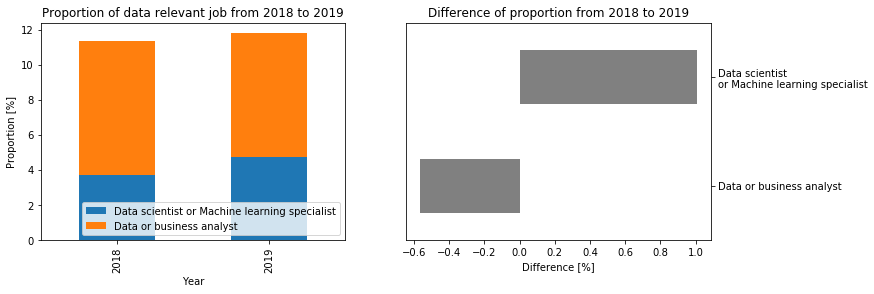

In [359]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust()

ax1 = plt.subplot(1, 2, 1)
proportion.plot.bar(stacked=True, ax=ax1)
plt.legend(loc='lower right')
plt.title('Proportion of data relevant job from 2018 to 2019')
plt.xlabel('Year')
plt.ylabel('Proportion [%]')

ax2 = plt.subplot(1, 2, 2)
ax2.yaxis.tick_right()
proportion_diff.plot.barh(legend=False, color='grey', ax=ax2)
plt.title('Difference of proportion from 2018 to 2019')
plt.xlabel('Difference [%]')

plt.show()

The proportion of data science job has increased from 3.7% to 4.7%. So the job demand is still increasing slightly. However, similar job such as data analyst proportion has decreased approximately 0.56 % from 2018 to 2019. So the total of these two job has decreased also. 

### How much data scientists satisfied with their job in 2018 and 2019?

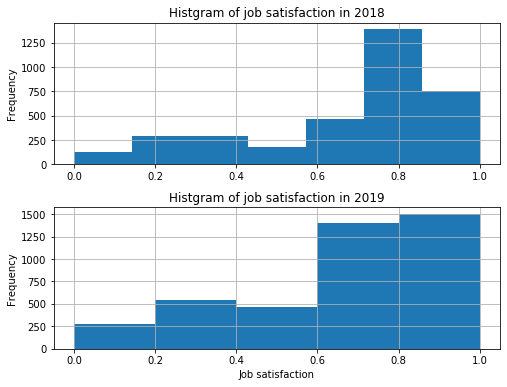

In [360]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(hspace=0.3)

ax = plt.subplot(2, 1, 1)
df_2018_data.JobSatisfaction.hist(bins=7)
plt.title('Histgram of job satisfaction in 2018')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2, sharex=ax)
df_2019_data.JobSat.hist(bins=5)
plt.title('Histgram of job satisfaction in 2019')
plt.xlabel('Job satisfaction')
plt.ylabel('Frequency')

plt.show()

In [361]:
print('Median satisfaction value in 2018: ',df_2018_data.JobSatisfaction.median())
print('Mean satisfaction value in 2018:   ',df_2018_data.JobSatisfaction.mean())
print('Median satisfaction value in 2019: ',df_2019_data.JobSat.median())
print('Mean satisfaction value in 2019:   ',df_2019_data.JobSat.mean())

Median satisfaction value in 2018:  0.8333333333333334
Mean satisfaction value in 2018:    0.7037989145958298
Median satisfaction value in 2019:  0.75
Mean satisfaction value in 2019:    0.6970924690181125


Since the number of bins is different between 2018 and 2019, the comparison of median is not appropriate. The mean of satisfaction value is slightly decreased from 0.704 point to 0.697 point. However, it cannot be said decrease since the variation of multiple choice was decreased. That means the condition is not same. From the distribution of point, most of them are still satisfied with the job.

### How is the tendency of data scientist's annual salary in 2018 and 2019?

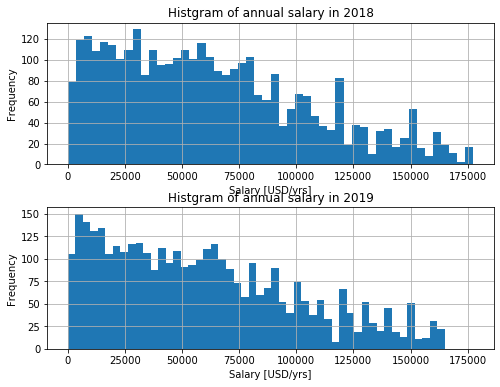

In [362]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(hspace=0.3)

ax = plt.subplot(2, 1, 1)
df_2018_filt.ConvertedSalary.hist(bins=50)
plt.title('Histgram of annual salary in 2018')
plt.xlabel('Salary [USD/yrs]')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2, sharex=ax)
df_2019_filt.ConvertedComp.hist(bins=50)
plt.title('Histgram of annual salary in 2019')
plt.xlabel('Salary [USD/yrs]')
plt.ylabel('Frequency')

plt.show()

In [363]:
print('median salary in 2018:',df_2018_filt.ConvertedSalary.median(),'USD')
print('median salary in 2019:',df_2019_filt.ConvertedComp.median(),'USD')

median salary in 2018: 56407.0 USD
median salary in 2019: 53277.0 USD


The median salary has decreased from 56407 USD to 53277 USD. Also, histogram shows frequency of lower range has increased. The frequency around 50,000 USD has not so changed as the trend. Since the data are from multiple countries, the trend change in relatively lower income can affect these trends. So, further investigation is necessary for more detail analysis. 

## Conclusion

As a result, data scientist job looks still attractive. The demand is still growing and satisfaction rate is high. The salary is slightly in down trend, but median is 53,277 USD and there is large opportunity for earning more than 100,000 USD. It may end the rapid growth but it is not yet down trend.